In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
completeTweetsDF = pd.read_csv('../data/finalDF.csv')
completeTweetsDF.head()

,Unnamed: 0,date,tweet,user_id,latitude,longitude,hashtags,original_tweet
0,0,2006-09-10 11:07:07,trying to figure out what this thing is,5622.0,39.1413,-84.506,NaN,trying to figure out what this thing is.
1,1,2007-03-17 09:59:46,killing my land line,5622.0,39.1413,-84.506,NaN,killing my land line.
2,2,2007-03-18 11:48:24,my expense report,5622.0,39.1413,-84.506,NaN,my expense report
3,3,2007-03-21 12:20:05,putting down the llama book,5622.0,39.1413,-84.506,NaN,putting down the llama book.
4,4,2007-03-23 14:27:29,delegating,5622.0,39.1413,-84.506,NaN,delegating


In [82]:
wordHappinessDF = pd.read_csv('../data/Data_Set_S1.txt', sep='\t',on_bad_lines='skip')
wordHappinessDF.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


In [83]:
completeTweetsDF.dtypes

Unnamed: 0          int64
date               object
tweet              object
user_id           float64
latitude          float64
longitude         float64
hashtags           object
original_tweet     object
dtype: object

# Wrangling

In [86]:
# Function to get rid of words not in list.
def eliminateNonListWords(tweet, wordSet):
    if type(tweet) != str:
        return np.nan
    
    return ' '.join([w for w in tweet.split(' ') if w in wordSet])

# Word set
wordSet = set(wordHappinessDF['word'])
tweetsAllWordsInList = completeTweetsDF['tweet'].apply(lambda x: eliminateNonListWords(x,wordSet))

In [91]:
from multiprocessing import Pool
import scorer as s

def getScoresParallel(tweets, word_happiness_df, num_cpus=8):
    with Pool(num_cpus) as pool:
        results = pool.starmap(s.getScore, [(tweet, word_happiness_df) for tweet in tweets])
    return results

scores = pd.Series(getScoresParallel(tweetsAllWordsInList, wordHappinessDF))

In [92]:
completeTweetsDF['score'] = scores
completeTweetsDF.to_csv('../data/finalScores.csv')

In [100]:
completeTweetsDF

,Unnamed: 0,date,tweet,user_id,latitude,longitude,hashtags,original_tweet,score
0,0,2006-09-10 11:07:07,trying to figure out what this thing is,5622.0,39.14130,-84.5060,NaN,trying to figure out what this thing is.,4.154872
1,1,2007-03-17 09:59:46,killing my land line,5622.0,39.14130,-84.5060,NaN,killing my land line.,4.375000
2,2,2007-03-18 11:48:24,my expense report,5622.0,39.14130,-84.5060,NaN,my expense report,4.275294
3,3,2007-03-21 12:20:05,putting down the llama book,5622.0,39.14130,-84.5060,NaN,putting down the llama book.,4.258095
4,4,2007-03-23 14:27:29,delegating,5622.0,39.14130,-84.5060,NaN,delegating,NaN
...,...,...,...,...,...,...,...,...,...
8681436,8681436,2010-03-16 20:04:36,wassup,58669408.0,43.02179,-83.6757,NaN,@Courtneyr35 wassup,5.126667
8681437,8681437,2010-03-16 20:06:23,so tired,58669408.0,43.02179,-83.6757,NaN,So tired!,4.372500
8681438,8681438,2010-03-16 20:08:32,no im not,58669408.0,43.02179,-83.6757,NaN,@Miyoko92 no I'm not!,3.931111
8681439,8681439,2010-03-16 20:08:55,wat you up,58669408.0,43.02179,-83.6757,NaN,@Courtneyr35 wat you up 2?,4.048000


<function matplotlib.pyplot.show(close=None, block=None)>

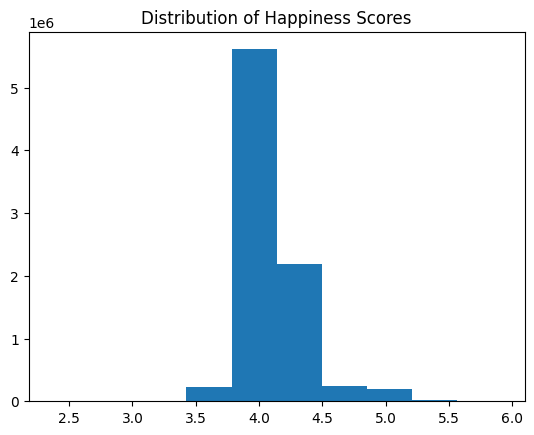

In [99]:
plt.hist(completeTweetsDF['score'])
plt.title("Distribution of Happiness Scores")
plt.show